In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def flatten_list(ll):
    flat = []
    for i in range(0, len(ll)):
        flat.extend(ll[i])
    return np.array(flat)

In [4]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/selected_waveforms'

with open(f'{peak_folder}/selection_cosmics_wlenNone_prom500.pkl', 'rb') as file:
    cosmics = pickle.load(file)
with open(f'{peak_folder}/selection_PNS_wlenNone_prom500.pkl', 'rb') as file:
    PNS = pickle.load(file)
with open(f'{peak_folder}/selection_PNS_neutrons_wlenNone_prom500.pkl', 'rb') as file:
    PNS_neutrons = pickle.load(file)
with open(f'{peak_folder}/selection_PNS_SideBand_wlenNone_prom500.pkl', 'rb') as file:
    PNS_SB = pickle.load(file)

print('cosmics', len(flatten_list(cosmics['peak_indices_2d'])))
print('PNS', len(flatten_list(PNS['peak_indices_2d'])))
print('PNS_neutrons', len(flatten_list(PNS_neutrons['peak_indices_2d'])))
print('PNS_SB', len(flatten_list(PNS_SB['peak_indices_2d'])))

cosmics 25150
PNS 46228
PNS_neutrons 3780
PNS_SB 39102


In [5]:
cosmics.keys()

dict_keys(['peak_indices_2d', 'peak_heights', 'properties', 'waveforms', 'widths', 'pedestals'])

In [6]:
samples  = {
    'cosmics': cosmics,
    'PNS': PNS,
    'PNS_neutrons': PNS_neutrons,
    'PNS_SB': PNS_SB
}

## Plot waveforms

In [7]:
PNS.keys()

dict_keys(['peak_indices_2d', 'peak_heights', 'properties', 'waveforms', 'widths', 'pedestals'])

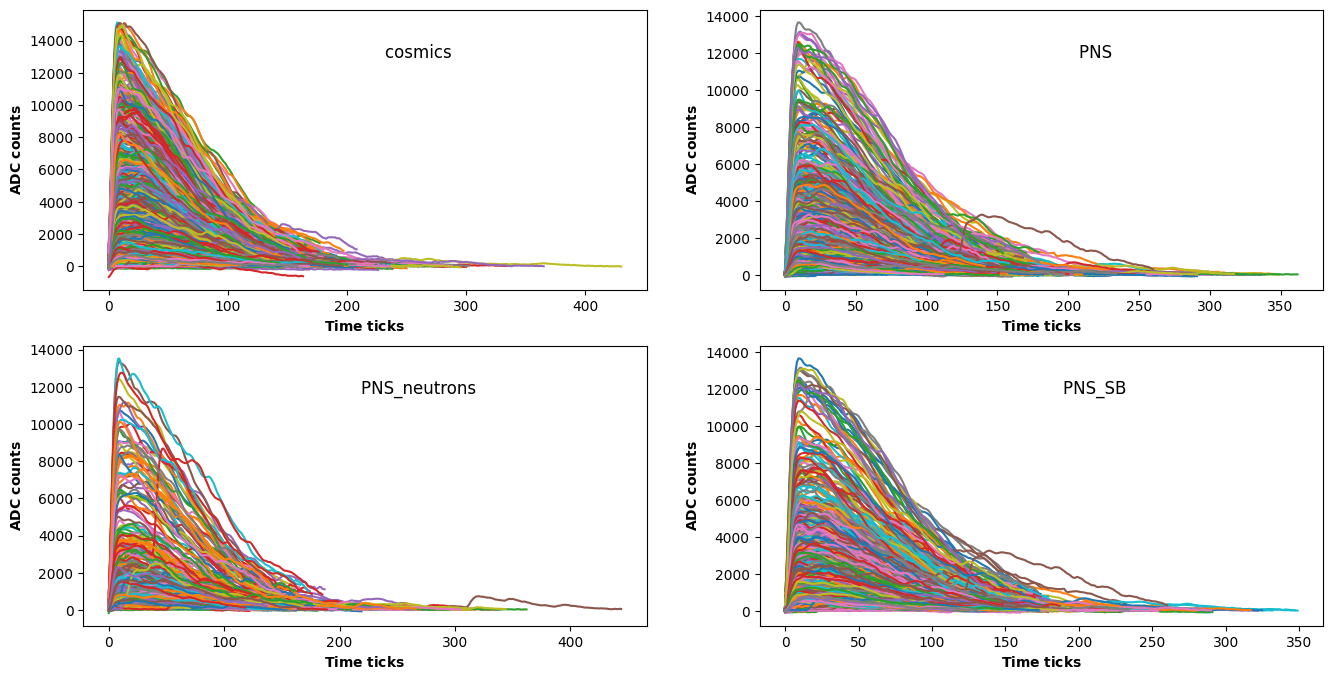

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for k,v in samples.items():
    ax = axs.flatten()[j]
    nTirggerRecords = 500 #len(res['waveforms'])
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = v['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            ax.plot(trigger_record[i].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{k} ", y=0.8, x = 0.6);
    j+=1




# Peak Heights and Positions

### Sanity Chekc

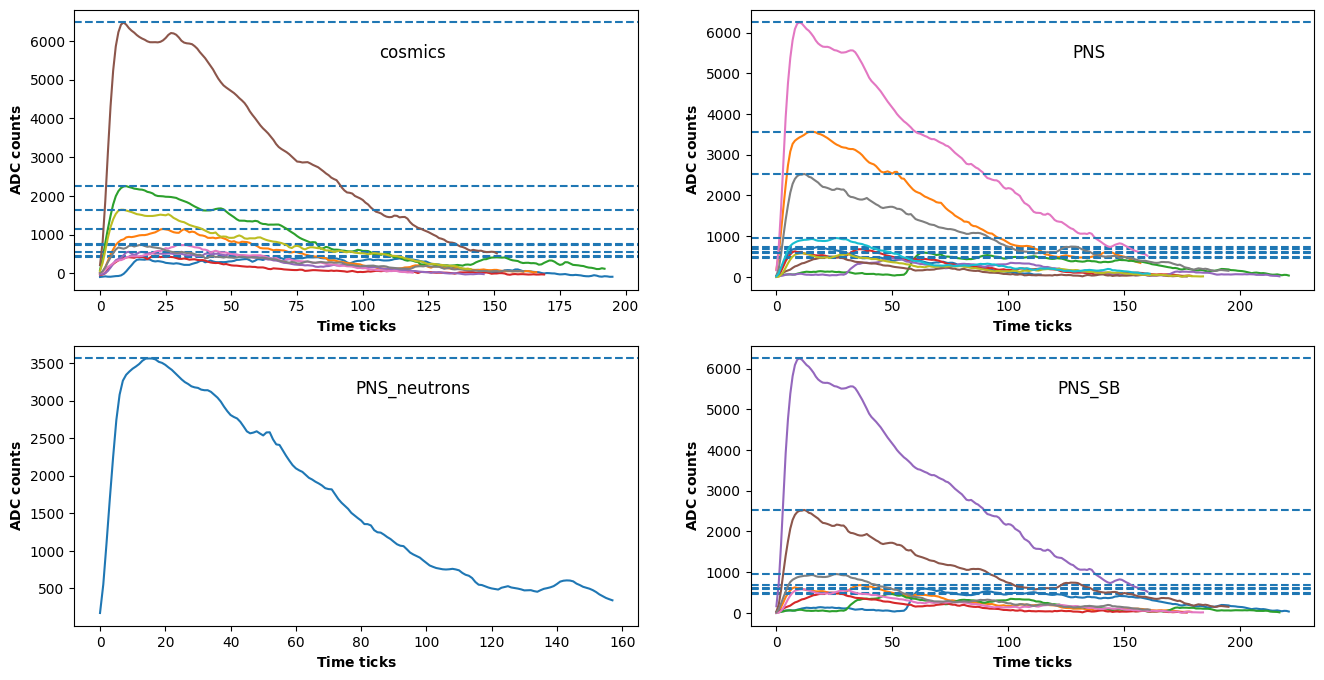

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for k,v in samples.items():
    ax = axs.flatten()[j]
    nTirggerRecords = 1 #len(res['waveforms'])
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = v['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            ax.plot(trigger_record[i].transpose())
            ax.axhline(y = v['peak_heights'][trigger_idx][i], linestyle='--')
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{k}", y=0.8, x = 0.6);
    j+=1;

## Peak Heights

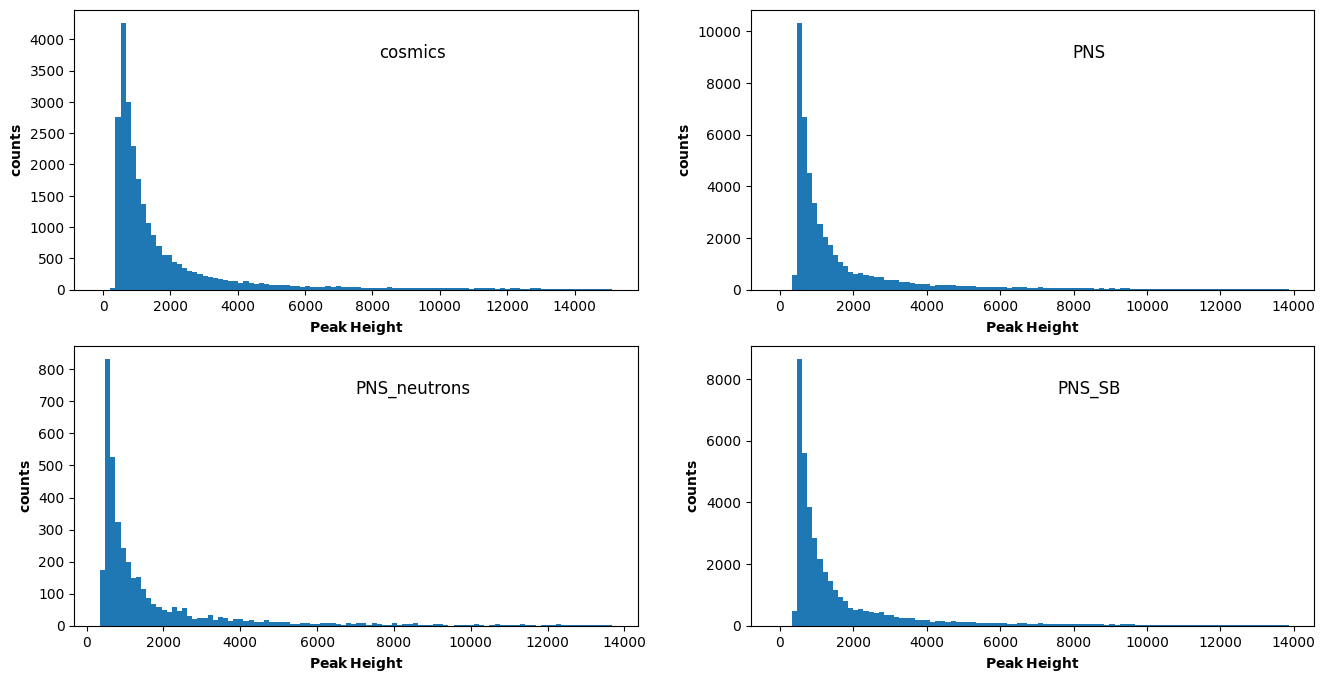

In [20]:
rg = None
# rg = (0, 4000) #None

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for k,v in samples.items():
    ax = axs.flatten()[j]
    nTirggerRecords = len(v['waveforms'])

    heights_hist = []
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = v['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            heights_hist.append(v['peak_heights'][trigger_idx][i])
    ax.hist(heights_hist, bins=100, label = k, range=rg) 
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Height}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"{k} \n  range = {rg}", x = 0.6, y = 0.7);
    else:
        ax.set_title(f"{k}", y=0.8, x = 0.6);

    j+=1;

## Peak Positions (within trigger rec.)

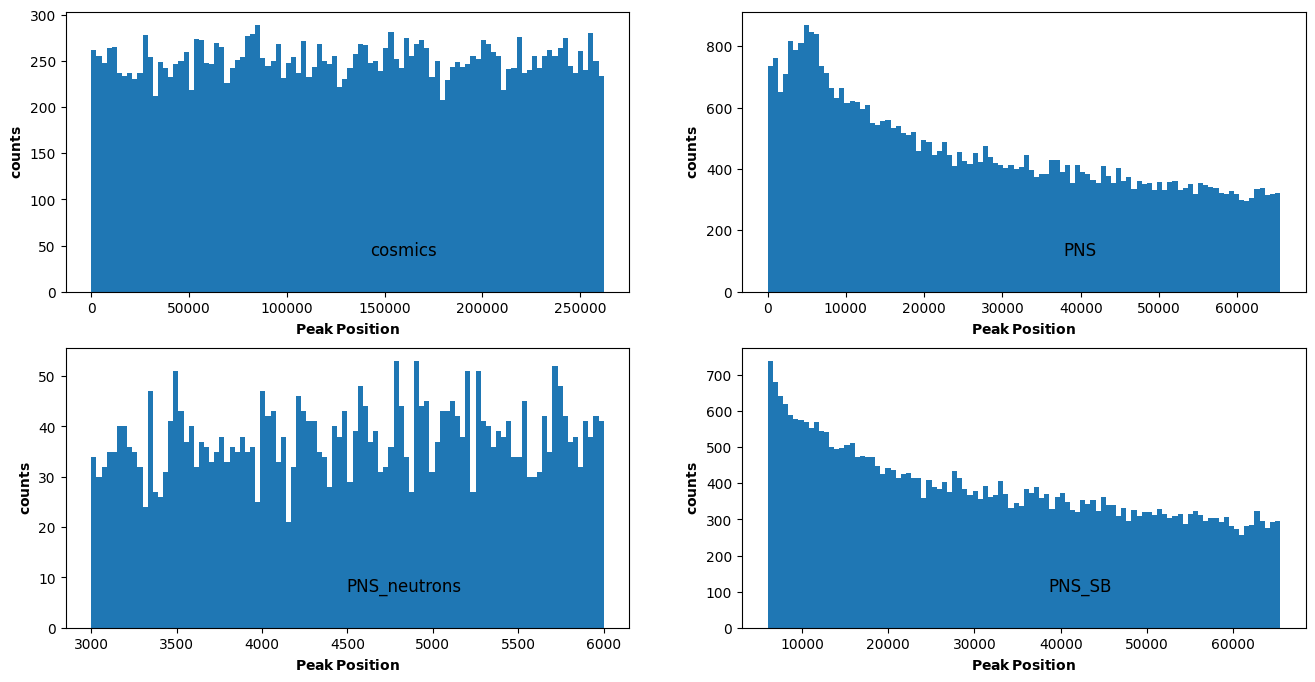

In [19]:
rg = None
# rg = (0, 4000) #None

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for k,v in samples.items():
    ax = axs.flatten()[j]
    nTirggerRecords = len(v['waveforms'])
    
    heights_hist = []
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = v['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            heights_hist.append(v['peak_indices_2d'][trigger_idx][i])
    ax.hist(heights_hist, bins=100, label = k, range=rg) 
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Position}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"{k} \n  range = {rg}", x = 0.2, y = 0.7);
    else:
        ax.set_title(f"{k}", y=0.1, x = 0.6);
    j+=1;

# Some fun

### prompt fraction / integral

In [47]:
def intergrals(waveforms, remove_negative_integrals=False):
    integrals = []
    for trigger_idx in range(0, len(waveforms)):
        trigger_record = waveforms[trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            if remove_negative_integrals:
                if np.sum(trigger_record[i]) > 0:
                    integrals.append(np.sum(trigger_record[i]))
            else: 
                integrals.append(np.sum(trigger_record[i]))
    return np.array(integrals)

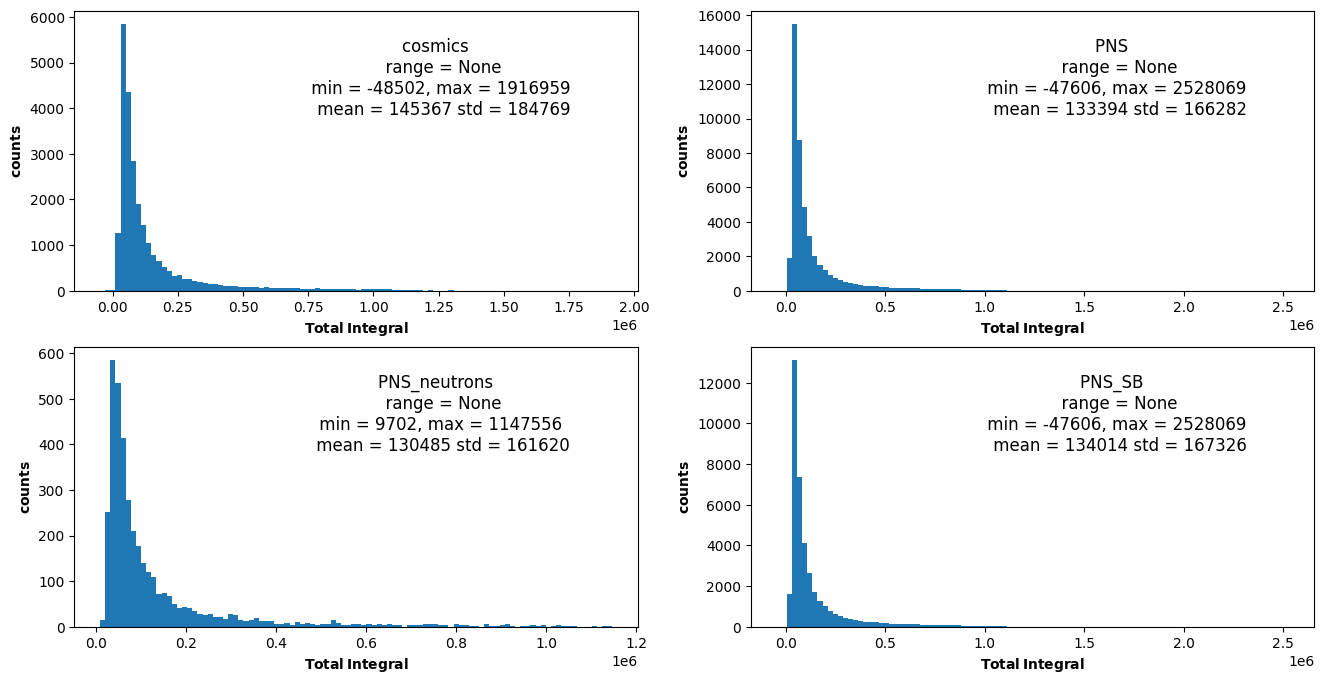

In [48]:
rg = None
den = False
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for k,v in samples.items():
    ax = axs.flatten()[j]

    Int_array = intergrals(v['waveforms'])
    ax.hist(Int_array, bins=100, range=rg, density=den) 
    ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    ax.set_title(f"{k}  \n  range = {rg} \n min = {Int_array.min()}, max = {Int_array.max()} \n mean = {Int_array.mean():.0f} std = {Int_array.std():.0f}", x = 0.65, y = 0.6);
    j+=1;

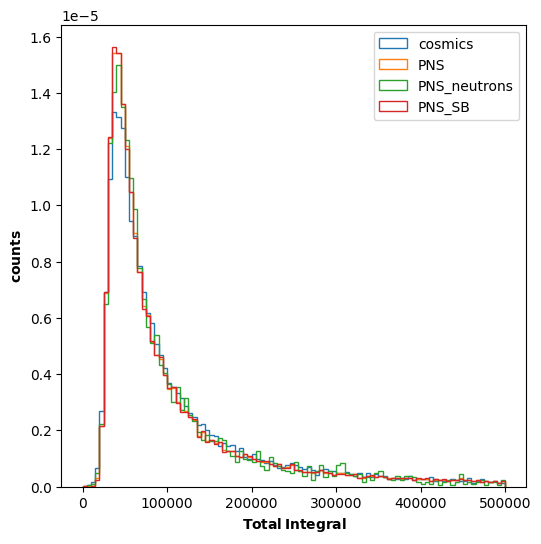

In [55]:
rg = None
rg = (0e6, 0.5e6)
den = True
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for k,v in samples.items():
    Int_array = intergrals(v['waveforms'], False)
    ax.hist(Int_array, bins=100, range=rg, density=den, label=k, histtype='step') 
    ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    ax.legend()

In [68]:

def promptFraction(waveforms, prompt_right_boundary=30, remove_negative_integrals=False):
    TotInt, promptInt = [], []

    for trigger_idx in range(0, len(waveforms)):
        trigger_record = waveforms[trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            I = np.sum(trigger_record[i])
            if remove_negative_integrals:
                if np.sum(trigger_record[i]) > 0:
                    TotInt.append(I)
                    promptInt.append(np.sum(trigger_record[i][:prompt_right_boundary]))
            else:
                TotInt.append(I)
                promptInt.append(np.sum(trigger_record[i][:prompt_right_boundary]))
    promptInt = np.array(promptInt)
    TotInt = np.array(TotInt)
    ratio = promptInt/TotInt
    return TotInt, promptInt, ratio


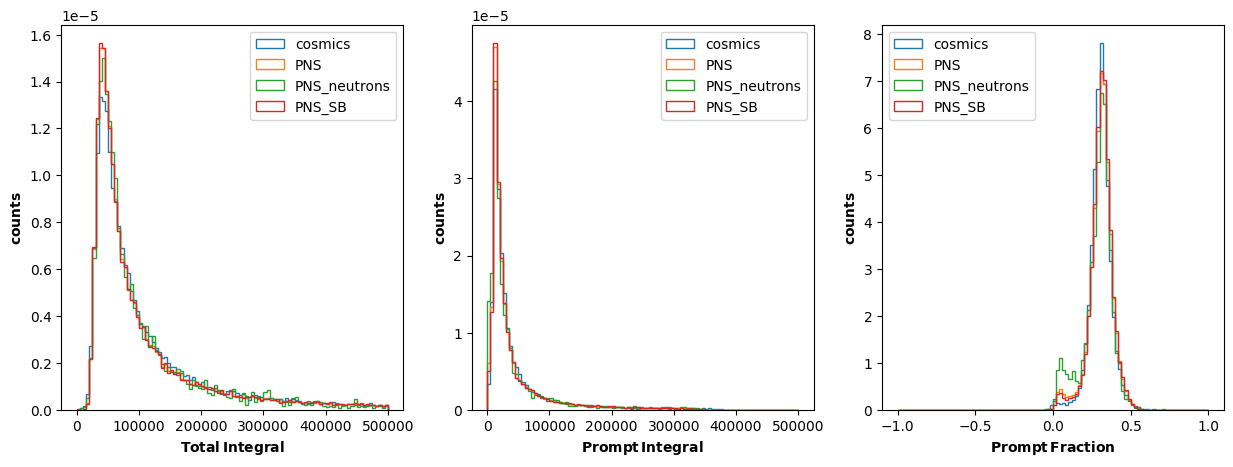

In [77]:
rg = None
den = True
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

rg = (0e6, 0.5e6)
ax = axs[0]
for k,v in samples.items():
    TotInt, promptInt, _ = promptFraction(v['waveforms'], 30, False)
    ax.hist(TotInt, bins=100, range=rg, density=den, label=k, histtype='step') 
    ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    ax.legend()

rg = (0e6, 0.5e6)
ax = axs[1]
for k,v in samples.items():
    TotInt, promptInt, _ = promptFraction(v['waveforms'], 30, False)
    ax.hist(promptInt, bins=100, range=rg, density=den, label=k, histtype='step') 
    ax.set_xlabel(r"$\mathrm{\bf Prompt \, Integral}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    ax.legend()

rg = (-1, 1)
ax = axs[2]
for k,v in samples.items():
    _, _, pns = promptFraction(v['waveforms'], 30, False)
    ax.hist(pns, bins=100, range=rg, density=den, label=k, histtype='step') 
    ax.set_xlabel(r"$\mathrm{\bf Prompt \, Fraction}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    ax.legend()


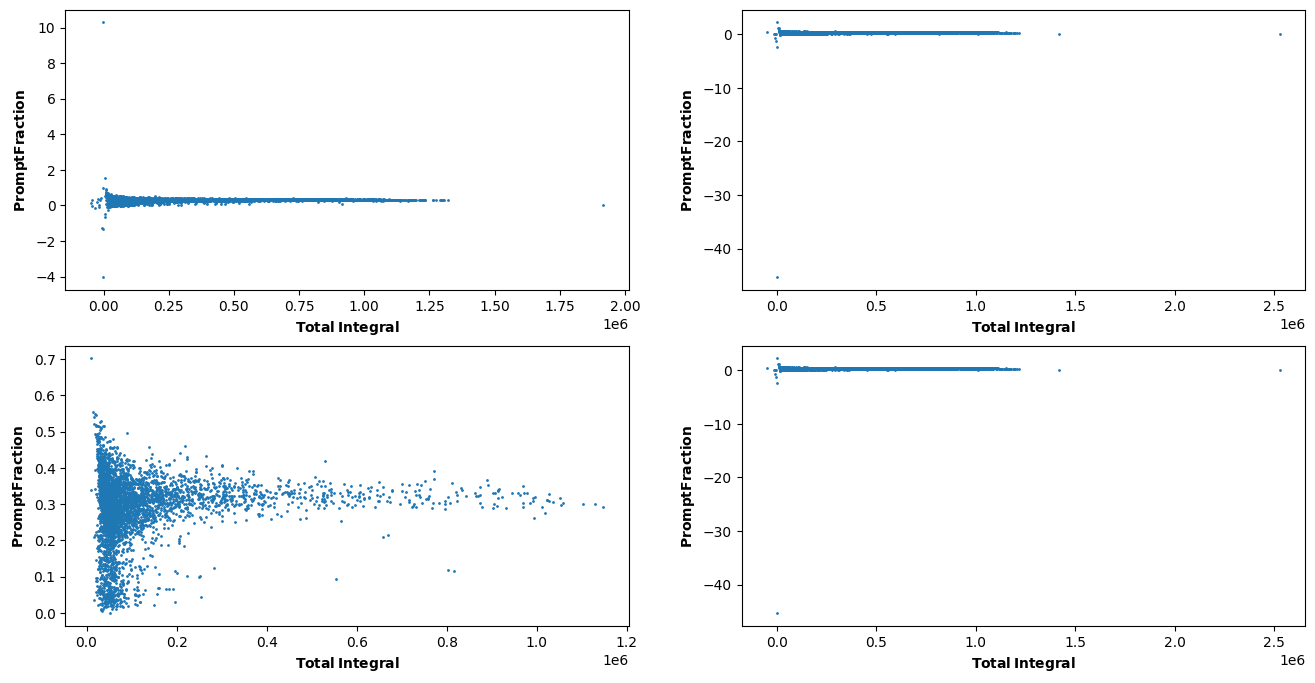

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for k,v in samples.items():
    ax = axs.flatten()[j]

    TotInt, promptInt, PSD = promptFraction(v['waveforms'], 30, False)
    ax.scatter(TotInt, PSD,  s=1, label='PNS')
    ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
    ax.set_ylabel(r"$\mathrm{\bf Prompt Fraction}$");
    # ax.set_title(f"{k}  \n  range = {rg} \n min = {Int_array.min()}, max = {Int_array.max()} \n mean = {Int_array.mean():.0f} std = {Int_array.std():.0f}", x = 0.65, y = 0.6);
    j+=1;

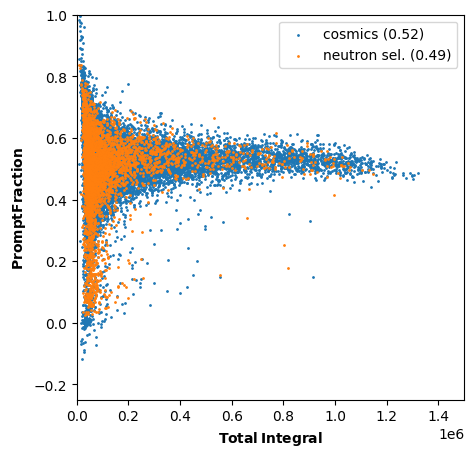

In [105]:
prompt_limit = 50
remove_negative_ints = True

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

TotInt, promptInt, PSD = promptFraction(cosmics['waveforms'], prompt_limit, remove_negative_ints)
ax.scatter(TotInt, PSD,  s=1, label=f'cosmics ({PSD.mean():.2f})')

TotInt, promptInt, PSD = promptFraction(PNS_neutrons['waveforms'], prompt_limit, remove_negative_ints)
ax.scatter(TotInt, PSD,  s=1, label=f'neutron sel. ({PSD.mean():.2f})')

ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
ax.set_ylabel(r"$\mathrm{\bf Prompt Fraction}$");
ax.set_ylim(-0.25, 1.0);
ax.set_xlim(0, 1.5e6);
ax.legend();


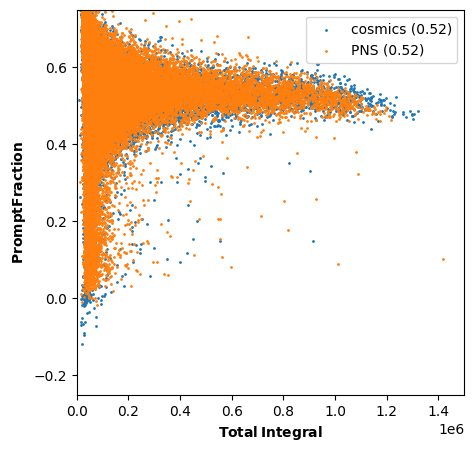

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

TotInt, promptInt, PSD = promptFraction(cosmics['waveforms'], 50, False)
ax.scatter(TotInt, PSD,  s=1, label=f'cosmics ({PSD.mean():.2f})')

TotInt, promptInt, PSD = promptFraction(PNS['waveforms'], 50, False)
ax.scatter(TotInt, PSD,  s=1, label=f'PNS ({PSD.mean():.2f})')

ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
ax.set_ylabel(r"$\mathrm{\bf Prompt Fraction}$");
ax.set_ylim(-0.25,0.75);
ax.set_xlim(0, 1.5e6);
ax.legend();
